## Question 2 (50 points)

***This question consists of pseudocode, extracting a frequency numerically, and plotting. Pull code from homework and midterms to optimize your effort.***

For the following potential energy for an anharmonic oscillator, we will create a figure that shows the angular frequency, $\omega$ versus the initial amplitude of the oscillator $Q_0$.

### The potential energy (notice the minus sign on the fourth-order term)

$$ \Delta U = \frac{1}{2} K Q^2 - \frac{1}{4} D Q^4 + \frac{1}{6} \Phi Q^6 $$

### Constrained parameters

Take $K = 1$, $D=2.4$, $\Phi=1$, and $M = 1$.

### Plotting constraints

Plot a range of initial displacements spanning $Q_0 = \pm 1.7$ (see the representative plot below)

### Extracting the angular frequency

Recall that in the second midterm and subsequent weeks we developed a strategy for a variant of this problem which used the following steps:

1. Solve the differential equation for $Q(t)$ for initial value $Q_0$ (take the initial velocity to be zero);
2. Use `ipywidgets` to explore this solution in a figure and extract approximate values of the period $T$ as a function of $Q_0$. We found $T$ by getting the time from peak to peak or valley to valley;
3. Interpolate the approximate values of $T$;
4. Use in interpolated values of $T$ as a guess for a minima finding algorithm;
5. Convert the extracted values of $T$ to angular frequency by $\omega=\frac{2\pi}{T}$.
6. To deal with the stationary solutions (e.g. $Q_0 = 0$), we used analytic results for the angular frequency by taking using the formula $\omega = \sqrt{\frac{1}{M}\frac{d^2\Delta U}{d Q^2}}$.

***This means you should be able to copy and paste most of the code from the midterm and subsequent weeks to optimize your effort***

### Steps to construct the plot

1. Write pseudocode to set up your strategy (**10 points**);
2. Expand your pseudocode to include INPUT, OUTPUT, and TESTS that you could use to program each custom function (**10 points**);
3. Write those functions and test them (**10 points**);
4. Combine your custom functions for streamlined code and the plot of $\omega$ versus $Q_0$ (**10 points**);
5. Describe the plot in your own words (**10 points**).

### Plot of the potential energy

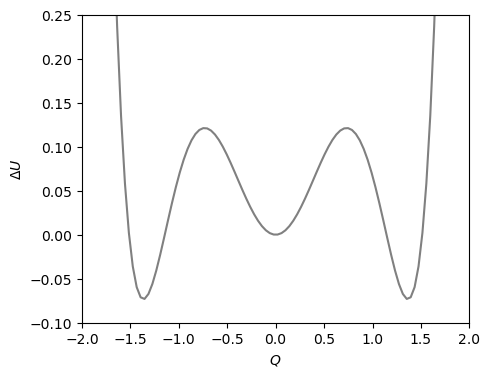

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# define potential function
def potential_energy(Q, K=1.0, D=2.4, Phi=1.0):
    return (1/2) * K * Q**2 - (1/4) * D * Q**4 + (1/6) * Phi * Q**6

# define mesh for plotting
Q_mesh = np.linspace(-2,2,100)
U_mesh = potential_energy(Q_mesh)

# construct figure
plt.figure(figsize=(5, 4))
plt.plot(Q_mesh, U_mesh, color="gray")
plt.xlabel("$Q$")
plt.ylabel("$\Delta U$")
plt.xlim(-2,2)
plt.ylim(-0.1,0.25)
plt.show()

In [ ]:
## Pseudocode:
# import libraries
# e.g., numpy, matplotlib, scipy.integrate, ipywidgets

# define constants (K, D, phi, delta t)

# get_eqns_of_motion
# analytically or sympy for derivs of potential

# System of equations
# input: position/displacement, velocity, time, Q(t=0),Qdot(t=0)
# outputs: time derivatives (d/dt Q, d/dt Qdot)
# tests: can test a few cases analytically

# solve_for_dynamics
# minimization, root finding

# extract_frequency : make guess, replug for period
# plot_frequency_vs_Q0

In [28]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ipywidgets as widgets
from ipywidgets import interact, FloatSlider
import sympy as sp



# define constants (K, D, phi, delta t)
K = 1
D = 2.4
Phi = 1
m = 1
omega = 1


# get_eqns_of_motion
def potential_energy(Q, K=1.0, D=2.4, Phi=1.0):
    return (1/2) * K * Q**2 - (1/4) * D * Q**4 + (1/6) * Phi * Q**6


# analytically or sympy for derivs of potential
def dU_potential_energy(t, y, D, m, K, Phi):
    Q, V = y
    dQdt = V
    dVdt = -K/m * Q + D/m * Q**3 - Phi/m * Q**5 
    return [dQdt, dVdt]


# System of equations
# input: position/displacement, velocity, time, Q(t=0),Qdot(t=0)
# outputs: time derivatives (d/dt Q, d/dt Qdot)
# tests: can test a few cases analytically

# Initial conditions for Q and V
Q0 = 0.0  
V0 = 0.0  
y0 = [Q0, V0]

# Time span for the solution
t_span = (0, 50)  # start and end time
t_eval = np.linspace(0, 50, 1000)  # times at which to store the computed solution


#use differential equation solvers to find Q(t)
t_max = 50 #test values for max
sol = solve_ivp(dU_potential_energy, 
                [0, t_max], 
                y0, 
                method='RK45', 
                t_eval=np.linspace(0, t_max, 1000), 
                args=(m, D, K, Phi)) 

# solve_for_dynamics
# minimization, root finding
def solve_diff_plot(t_max, Q0):
    # define initial values of Q and V
    y0 = [Q0, V0]
    
    # Solve the system of ODEs
    sol = solve_ivp(dU_potential_energy, [0, t_max], y0, t_eval=np.linspace(0, t_max, 1000), args=(m, D, Phi, K))
    Q_sol = sol.y[0]
    V_sol = sol.y[1]
    t_sol = sol.t

# extract_frequency : make guess, replug for period
# plot_frequency_vs_Q0
 # plot Q, V
    
    plt.figure(figsize=(11,4))
    plt.plot(t_sol, Q_sol, label="Q(t)", color = 'red')
    #plt.plot(t_sol, V_sol, label="Velocity V(t)")
    plt.xlabel("Time")
    plt.ylabel("Amplitude of Q")
    plt.legend()
    plt.show()

# Create sliders for interactive plotting, including a time slider
#K_slider = widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='K')
#Phi_slider = widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='Phi')
#V0_slider = widgets.FloatSlider(value=0.0, min=0.0, max=5.0, step=0.1, description='Initial V_0')
t_max_slider = widgets.FloatSlider(value=10, min=0, max=50, step=1, description='Max Time')
Q0_slider = widgets.FloatSlider(value=0.0, min=-1.7, max=1.7, step=0.01, description='Initial Q_0')
interactive_plot = widgets.interactive(solve_diff_plot,
                                       t_max=t_max_slider, Q0=Q0_slider) #omega=omega_slider, Phi=Phi_slider, V0=V0_slider)
display(interactive_plot)


interactive(children=(FloatSlider(value=10.0, description='Max Time', max=50.0, step=1.0), FloatSlider(value=0…

Text(0, 0.5, '$\\omega$')

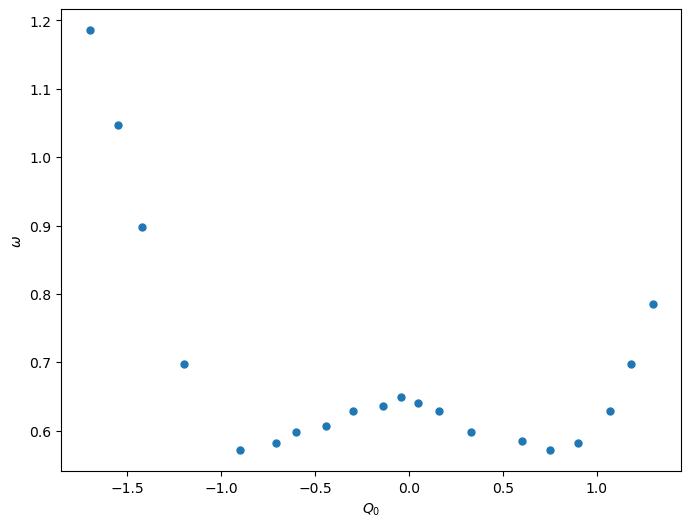

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


# Data:

Q_0_by_hand = np.array([-1.7, -1.55, -1.42, -1.2, -0.9, -0.71, -0.60, -0.44, -0.3, -0.14, -0.04, 0.05, 0.16, 0.33, 0.60, 0.75, 0.90, 1.07, 1.18, 1.30])
T_by_hand = np.array([5.3, 6.0, 7.0, 9.0, 11.0, 10.79, 10.5, 10.35, 10.0, 9.87, 9.67, 9.8, 10.00, 10.5, 10.75, 11.0, 10.8, 10.00, 9.0, 8.00])
Omega_by_hand = 2*np.pi / T_by_hand

# Plot
plt.figure(figsize=(8, 6))
plt.plot(Q_0_by_hand, Omega_by_hand, 'o', label='Original Data', markersize=5)
plt.xlabel("$Q_0$")
plt.ylabel("$\omega$")

The plot of frequency $\omega$ vs. initial displacement $Q_0$ shows the parabolic nature of the period $T$. As $Q_0$ moves away from $0$ locally, $\omega$ follows the shape of a saddle point. This means that as $Q$ is displaced further away from the origin, the frequency $\omega$ begins to decrease, implying a stronger restoring force closer to approximately $\pm 0.75$. When compared to the potential energy function this lines up, as there are two saddle points at approximately $\pm 0.75$. Moving past this saddle point we see the frequency $\omega$ begin to increase, implying a lower restoring force. Indeed this is also consistent with the potential energy graph which shows a decrease in energy after $\pm 0.75$. Extending this plot beyond $Q_0 = \pm 1.7$, I suspect the frequency will drop exponentially as the potential energy wall increases.